# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [220]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import json

# Import API key
from api_keys import api_key1
#print(api_key1)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [206]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [194]:
city_search = [] 
for city in cities:
    names = city.split()
    city_searchable = '+'.join(names)
    city_search.append(city_searchable)
#city_search

In [195]:
city_index = list(range(1, (len(cities)+1)))
#print(city_index)

In [196]:
name =[]; temp_min =[]; temp_max =[]; lat =[]; lon = []; hum =[]; cloud =[]; wind =[]; response_json = []; dt = []; country =[]

In [197]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval")
print("-----------------------------------------------")
for city in city_search:
    try:
        target_url = base_url + "APPID=" + api_key1 + "&q=" + str(city_search[city_search.index(city)])
        print(f"Processing record number: {(city_search.index(city)+1)} #ID: {city}")
        weather_data = requests.get(target_url).json()
        response_json.append(weather_data)
        name.append(response_json[city_search.index(city)]["name"])
        temp_min.append(response_json[city_search.index(city)]["main"]["temp_min"])
        temp_max.append(response_json[city_search.index(city)]["main"]["temp_max"])
        lat.append(response_json[city_search.index(city)]["coord"]["lat"])
        lon.append(response_json[city_search.index(city)]["coord"]["lon"])
        hum.append(response_json[city_search.index(city)]["main"]["humidity"])   
        cloud.append(response_json[city_search.index(city)]["clouds"]["all"])
        wind.append(response_json[city_search.index(city)]["wind"]["speed"])
        dt.append(response_json[city_search.index(city)]["dt"])
        country.append(response_json[city_search.index(city)]["sys"]["country"])
    except (KeyError):
        print("City not found... skipping.")

Beginning Data Retrieval
-----------------------------------------------
Processing record number: 1 #ID: taolanaro
City not found... skipping.
Processing record number: 2 #ID: thompson
Processing record number: 3 #ID: ushuaia
Processing record number: 4 #ID: richards+bay
Processing record number: 5 #ID: avarua
Processing record number: 6 #ID: souillac
Processing record number: 7 #ID: la+ronge
Processing record number: 8 #ID: bredasdorp
Processing record number: 9 #ID: gobabis
Processing record number: 10 #ID: nikolskoye
Processing record number: 11 #ID: punta+arenas
Processing record number: 12 #ID: krasnaya+gorka
Processing record number: 13 #ID: hermosillo
Processing record number: 14 #ID: port+elizabeth
Processing record number: 15 #ID: chokurdakh
Processing record number: 16 #ID: tessalit
Processing record number: 17 #ID: clyde+river
Processing record number: 18 #ID: srednekolymsk
Processing record number: 19 #ID: rikitea
Processing record number: 20 #ID: maarianhamina
City not fo

Processing record number: 173 #ID: barentsburg
City not found... skipping.
Processing record number: 174 #ID: saint-francois
Processing record number: 175 #ID: flinders
Processing record number: 176 #ID: samarai
Processing record number: 177 #ID: huilong
Processing record number: 178 #ID: redmond
Processing record number: 179 #ID: bethel
Processing record number: 180 #ID: yumen
Processing record number: 181 #ID: pitimbu
Processing record number: 182 #ID: severo-kurilsk
Processing record number: 183 #ID: castro
Processing record number: 184 #ID: itainopolis
City not found... skipping.
Processing record number: 185 #ID: rocha
Processing record number: 186 #ID: vaitupu
City not found... skipping.
Processing record number: 187 #ID: hobart
Processing record number: 188 #ID: ahumada
City not found... skipping.
Processing record number: 189 #ID: taksimo
Processing record number: 190 #ID: banjar
Processing record number: 191 #ID: tasbuget
City not found... skipping.
Processing record number: 1

Processing record number: 345 #ID: beringovskiy
Processing record number: 346 #ID: martapura
Processing record number: 347 #ID: kuroishi
Processing record number: 348 #ID: machico
Processing record number: 349 #ID: abu+dhabi
Processing record number: 350 #ID: talah
City not found... skipping.
Processing record number: 351 #ID: micheweni
Processing record number: 352 #ID: parry+sound
Processing record number: 353 #ID: nuuk
Processing record number: 354 #ID: waingapu
Processing record number: 355 #ID: siocon
Processing record number: 356 #ID: tupik
Processing record number: 357 #ID: jinchang
Processing record number: 358 #ID: doha
Processing record number: 359 #ID: manzhouli
Processing record number: 360 #ID: roswell
Processing record number: 361 #ID: saint+george
Processing record number: 362 #ID: wanning
Processing record number: 363 #ID: bargal
City not found... skipping.
Processing record number: 364 #ID: karakendzha
City not found... skipping.
Processing record number: 365 #ID: hihi

Processing record number: 520 #ID: chilca
Processing record number: 521 #ID: muros
Processing record number: 522 #ID: puerto+colombia
Processing record number: 523 #ID: san+jose
Processing record number: 524 #ID: rodrigues+alves
Processing record number: 525 #ID: casper
Processing record number: 526 #ID: niquero
Processing record number: 527 #ID: ulladulla
Processing record number: 528 #ID: kochubey
Processing record number: 529 #ID: kupang
Processing record number: 530 #ID: voznesenye
Processing record number: 531 #ID: winnemucca
Processing record number: 532 #ID: phan+rang
City not found... skipping.
Processing record number: 533 #ID: rungata
City not found... skipping.
Processing record number: 534 #ID: plettenberg+bay
Processing record number: 535 #ID: jibuti
City not found... skipping.
Processing record number: 536 #ID: lebyazhye
Processing record number: 537 #ID: huinan
Processing record number: 538 #ID: mahajanga
Processing record number: 539 #ID: pontianak
Processing record num

In [198]:
#print(target_url)

In [279]:
data = name; cities = pd.DataFrame(data)
cities['temp_min'] = temp_min; 
cities['temp_max'] = temp_max; 
cities['humidity'] = hum; 
cities['latitude'] = lat; 
cities['longitude'] = lon; 
cities['clouds'] = cloud; 
cities['wind_speed'] = wind; 
cities['date_time'] = dt
#cities['date'] = time.ctime(cities['date_time'])
cities['country'] = country; 
cities = cities.rename(index=str, columns={0:"city"}); city_weather = cities

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [280]:
city_weather.to_csv(output_data_file, sep=',')

In [281]:
city_weather.head()

,city,temp_min,temp_max,humidity,latitude,longitude,clouds,wind_speed,date_time,country
0,Thompson,272.150,272.150,92,55.74,-97.86,90,2.10,1540836000,CA
1,Ushuaia,283.150,284.150,31,-54.81,-68.31,40,1.50,1540836000,AR
2,Richards Bay,298.936,298.936,54,-28.77,32.06,12,7.52,1540840027,ZA
3,Avarua,295.150,295.150,94,-21.21,-159.78,90,8.20,1540836000,CK
4,Souillac,277.150,278.150,93,45.60,-0.60,90,3.10,1540837800,FR


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [282]:
import time
import datetime
d = datetime.date(2015,1,5)

unixtime = time.mktime(d.timetuple())

In [283]:
x_axis = city_weather['latitude']; y_axis1 = ((city_weather['temp_max'] - 273.15)*9/5 + 32); 
y_axis2 = city_weather['humidity']; y_axis3 = city_weather['clouds']; y_axis4 = city_weather['wind_speed']

ANALYSIS
---------------------------------------------------------------------------------------------------------------------
Temperature peaks between -20 and 20 degrees latitude, supporting the notion that it gets hotter as one approaches the equator. There is also a clear negative trend in temperature as latitude increases between 20 and 80 degrees. However, the opposite is true as latitude approaches 0 from -60: temperature actually increases, though the relationship is not as strong as that observed in the northern hemisphere. One possible reason the relationship from latitude -60 to 0 is less pronounced is the presence of fewer data points within that range. The lack of data points in the southern hemisphere is most likely due to the lower number of cities located in the southern hemisphere. The other three plots have no distinct trends, which implies no meaningful relationship between latitude and the three other measured weather variables.


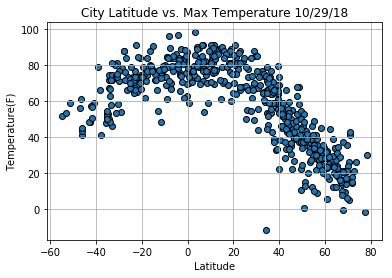

In [284]:
lat_vs_temp = (plt.scatter(x_axis, y_axis1, linewidth=1, edgecolors="black"), 
               plt.xlabel("Latitude"), plt.ylabel("Temperature(F)"), plt.title("City Latitude vs. Max Temperature 10/29/18"), 
               plt.grid(b=None, which='major', axis='both'))
print("ANALYSIS")
print("---------------------------------------------------------------------------------------------------------------------")
print("Temperature peaks between -20 and 20 degrees latitude, supporting the notion that it gets hotter as one"
      " approaches the equator." 
      " There is also a clear negative trend in temperature as latitude increases between 20 and 80 degrees."
      " However, the opposite is true as latitude approaches 0 from -60: temperature actually increases,"
      " though the relationship is not as strong as that observed in the northern hemisphere."
      " One possible reason the relationship from latitude -60 to 0 is less pronounced is the presence of fewer data" 
      " points within that range."
      " The lack of data points in the southern hemisphere is most likely due to the lower number of cities"
      " located in the southern hemisphere."
      " The other three plots have no distinct trends, which implies no meaningful relationship between latitude and the" 
      " three other measured weather variables.")

In [285]:
plt.savefig("output_images/lat_vs_temp.png")

<Figure size 432x288 with 0 Axes>

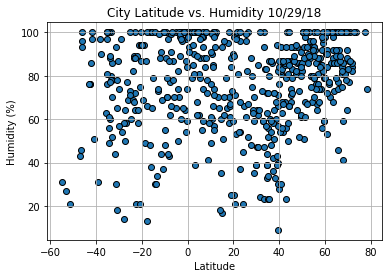

In [286]:
lat_v_hum = (plt.scatter(x_axis, y_axis2, linewidth=1, edgecolors="black"), plt.xlabel("Latitude"), plt.ylabel("Humidity (%)"),
             plt.title("City Latitude vs. Humidity 10/29/18"), plt.grid(b=None, which='major', axis='both'))

In [287]:
plt.savefig("output_images/lat_vs_hum.png")

<Figure size 432x288 with 0 Axes>

In [288]:
lat_vs_cloud = (plt.scatter(x_axis, y_axis3, linewidth=1, edgecolors="black"), plt.xlabel("Latitude"),
                plt.ylabel("Cloud Cover (%)"), plt.title("City Latitude vs. Cloud Cover 10/29/18"), 
                plt.grid(b=None, which='major', axis='both')

SyntaxError: unexpected EOF while parsing (<ipython-input-288-d34bf5db25ca>, line 3)

In [289]:
plt.savefig("output_images/lat_vs_cloud.png")

<Figure size 432x288 with 0 Axes>

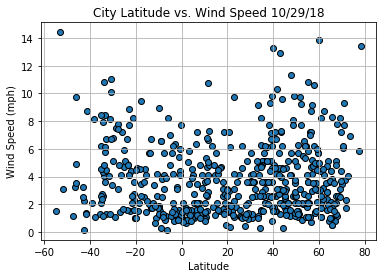

In [290]:
lat_vs_wind = (plt.scatter(x_axis, y_axis4, linewidth=1, edgecolors="black"), plt.xlabel("Latitude"), 
               plt.ylabel("Wind Speed (mph)"), plt.title("City Latitude vs. Wind Speed 10/29/18"), 
               plt.grid(b=None, which='major', axis='both'))

In [291]:
plt.savefig("output_images/lat_vs_wind.png")

<Figure size 432x288 with 0 Axes>